***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [4. The Visibility Space](4_0_introduction.ipynb)
    * Previous: [4.0 Introduction](4_0_introduction.ipynb)
    * Next: [4.2 The Baseline and its Representation in Space](4_2_the_baseline_and_its_representation_in_space.ipynb)

***

Import standard modules:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [6]:
from IPython.display import HTML
HTML('../style/code_toggle.html')

# 4.1 周期函数和傅里叶分析
# 4.1 Periodic Functions and Fourier Analysis

<span style="background-color:red">TLG:MC: Merge the fundamentals about Fourier series and Fourier transform into chapter two. Keep the physics related to visibilities here, for instance the point source stuff and the Gaussian source stuff. Cut down in size.</span>

<span style="background-color:red">TLG:RC: Reduce your use of subsections. You go way to deep into subsections.</span>

本章我们将概述波和傅里叶分析，尽可能把傅立叶分析变得很直观，给学生建立起一定深度的物理直觉。

关于命名：在文献中，根据命名规则，傅里叶空间可以被称为相空间，傅立叶空间，k-空间，可见空间，$uv$-空间等。 在本书中，这些术语可以互换使用，即它们有着相同的含义。

<span style="background-color:cyan">TLG:GM: 这些定义是否在词汇表中？ 尤其是傅立叶分析

***
In this section, we will talk briefly about waves, then introduce Fourier analysis. Our aim is to make Fourier analysis as obvious as possible, while still going into sufficient depth to allow students to develop a good physical intuition.

A short note on nomenclature: in the literature, Fourier space can be referred to as *phase space*, *Fourier space*, *$k$-space*, *visibility space*, *uv-space* and more besides depending on the discipline. In this book, these terms will be used interchangeably: they all mean the same thing.

<span style="background-color:cyan">TLG:GM: Are these definitions in the glossary? Fourier analysis especially.</span>


### 4.1.1 周期函数
### 4.1.1 Periodic Functions

本小节将简要描述周期函数的一些重要性质（在 [$\S$2.2](../2_Mathematical_Groundwork/2_2_important_functions.ipynb) 中已有详细的描述，在此只是复习一下）。

***
Here, we will provide a very brief reminder of important properties of periodic functions. These should already be covered - and in greater detail - in [$\S$2.2](../2_Mathematical_Groundwork/2_2_important_functions.ipynb). This should therefore not be new material, but things to keep in mind as you read this chapter.

#### 4.1.1.1 周期函数的性质
#### 4.1.1.1 Characteristics of a Periodic Function

周期函数是无穷的重复函数，最简单的周期函数是简单的正弦函数（*sine*）:

***
A periodic function is an endlessly repeating function. The simplest periodic function is the humble *sine* function:

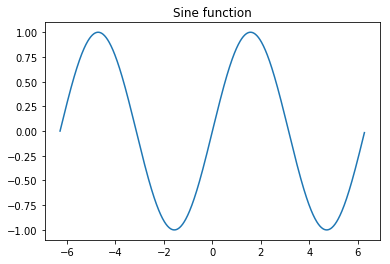

In [7]:
x=(np.arange(800)-400)/200.*np.pi
plt.title("Sine function")
plt.plot(x,np.sin(x))

**图4.1.1**: 简单的正弦函数

**Figure 4.1.1**: A simple sine function

可以用两个变量来定义一个周期函数：幅值和频率。幅值定义了波的大小，频率定义了波的重复性。在上面的例子里，幅值和频率都设置为1，因此，函数每$2\pi$（正弦函数是一个粒子沿圆形轨道的运动轨迹在y轴的投影） 重复一次且幅值为1（圆的半径为1）。



***
Two quantities define a periodic function: *amplitude* and *frequency*. 
<span style="background-color:cyan">TLG:GM: Are these definitions in the glossary?</span>
Amplitude defines the size of the wave; frequency defines how often the wave repeats. In the example above, both are set to 1; the function therefore repeats every $2\pi$ (since the sin function is the y-projection of a particle moving in a circular orbit), and has an amplitude of 1 (since the aforementioned orbit is of unit radius).

周期函数中还有另外两个常量：幅值偏移（*amplitude offset*）和相位偏移（*phase offset*）。

Two constants can also be added to a periodic function: *amplitude offset* and *phase offset*. 
<span style="background-color:cyan">TLG:GM: Are these definitions in the glossary?</span>
A more general expression for our basic periodic function would therefore be:

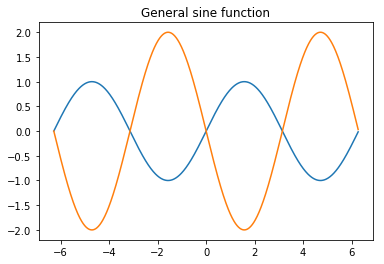

In [36]:
amplitude        = 2
frequency        = 1
phase_offset     = np.pi
amplitude_offset = 0
plt.title("General sine function")
plt.plot(x,np.sin(x))
plt.plot(x,amplitude*np.sin(frequency*x+phase_offset)+amplitude_offset)

**图4.1.2**：基本正弦函数与经过修改的正弦函数

**Figure 4.1.2**: Comparison between a basic sine function and what happens when you play with its parameters

强烈建议调整上图中的几个参数，看看结果有什么变化。例如，将幅值设置为-1？将幅值设置为-1，同时相位偏移设置为$ \pi$ ？

**提醒：** 将sine函数的相位偏移设置为 $\frac{\pi}{2}$，会得到一个不同的周期函数——余弦函数（*cosine*）。

***
I strongly encourage you to play with the graph above - for example, what happens when you set the amplitude to -1 ? What happens if you set the amplitude to -1 and the phase offset to $\pi$? 

<div class=advice>
**N.B.** Note that setting the phase offset of a sine function to $\frac{\pi}{2}$ gives you a *different* periodic function: a cosine function.
</div>

<div class=warn>
在许多物理教科书中，给出了频率 $f$ 与角频率 $\omega$ 的关系，如下：
<center>$\omega = 2\pi f$</center>
    
***
In many physics textbooks, the frequency $f$ may be referred to as the *angular frequency* $\omega$. The two are linked by the following relation:

<center>$\omega = 2\pi f$</center>
</div>

<span style="background-color:cyan">TLG:GM: Are these definitions in the glossary?</span>

#### 4.1.1.2 复杂周期函数
#### 4.1.1.2 Complex Periodic Functions


周期函数有很多，都是由简单正弦函数构成。其中物理学家最感兴趣的的一种周期函数是复指数周期函数，因为它可以用来描述电磁波。该函数的欧拉公式定义为：

There exist many periodic functions, all built from the humble sine function. One of particular interest to physicists - for it helps us describe electromagnetic waves - is the exponential form of the complex periodic function, as defined by Euler's formula:
<div class=warn>
<center>$e^{ix} = \cos(x) + i \sin(x)$</center>
</div>

本节我们将用到正弦跟指数周期函数。

For the remainder of this section, we will use both sine and exponential forms of periodic functions.

### 4.1.2 傅里叶分析：信号重建
### 4.1.2 Fourier analysis: Reconstructing Signals

现在我们将回顾傅里叶分析的相关属性，在开始本节剩下内容前，需要再次强调并记住这些重要概念。这些内容在 [$\S$2.3](../2_Mathematical_Groundwork/2_3_fourier_series.ipynb) 中有更详细的描述。

***
We will now go over relevant properties of Fourier analysis, again to highlight key concepts to keep in mind when you start delving into the rest of this section. All of this content is described in greater detail in [$\S$2.3](../2_Mathematical_Groundwork/2_3_fourier_series.ipynb).

#### 4.1.2.1 傅里叶级数
#### 4.1.2.1 Fourier Series

<span style="background-color:red">TLG:MC: Merge into 2.3. Try to add to that section
bringing with it some simplicity. Merge your explanation with what is there.</span>

***
在一个有界区域内，任何可积函数，无论其形状怎样，都可以分解为正弦和余弦函数的线形组合，这是法国数学家约瑟夫·傅里叶的一个重要发现。有界很重要，因为我们要用周期函数对原始函数进行复制，所以，这预先定义的界限事实上对应了正弦和余弦函数的最大周期。

A key discovery of French mathematician Joseph Fourier was that, within a bounded interval, any integrable function - no matter its shape - could be replicated using a linear combination of sines and cosines. The bounded interval is significant: since we are replicating the original function with periodic functions, the predefined interval will essentially correspond to the maximum period of our sines and cosines.

注意，傅里叶级数的更多数学细节已在 [$\S$ 2.3. &#10142;](../2_Mathematical_Groundwork/2_3_fourier_series.ipynb) 中讲到。 在这里，我们将进行实际操作以加深理解。

Note that Fourier series are covered in greater mathematical detail in [$\S$ 2.3. &#10142;](../2_Mathematical_Groundwork/2_3_fourier_series.ipynb). Here, we will try to give a more physical understanding of the operation.

对于任意函数（这里，以 $f(x) = (x-0.5)^3+3$) 为例）:

Consider some arbitrary function (here, $f(x) = (x-0.5)^3+3$):

Text(0.5,0,'x')

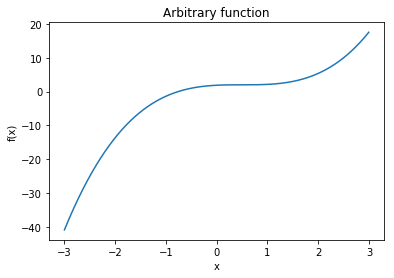

In [37]:
# define range of x-axis
x=(np.arange(1200)-600.)/200
# calculate y as a function of x
y=(x-0.5)**3+2
# plot
plt.plot(x,y)
plt.title("Arbitrary function")
plt.ylabel("f(x)")
plt.xlabel("x")


**Figure 4.1.3**: 任意函数 Plot of our arbitrary function


我们现在只对$x=[-2,2]$区间范围感兴趣，区间长度为4，我们将在此区间对原始函数$f(x)$进行复制。同时，函数$f(x)$在此区间可积，因此，我们能通过傅立叶级数，在该区间内对$f(x)$进行复制，公式如下：

Let us now consider that we are only interested in this function in the range $x=[-2,2]$. Our interval is thus 4: the period over which we will replicate our initial function $f(x)$ will be 4. Our function here is definitely integrable over the period of interest; we can thus perform a Fourier series and try to replicate our function over our interval of interest. The formula to do so is as follows:

<center>$\displaystyle f(t) = \frac{1}{2}a_0 + \sum_{n=1}^{\inf}[a_n\cos(w_n t) + b_n \sin(w_n t)]$</center>

其中

<center>$\displaystyle w_n = \frac{2\pi n}{x_1-x_0}$</center>

<center>$\displaystyle a_n = \frac{2}{x_1-x_0}\int_{x_0}^{x_1} f(t) \cos(w_n t)dt $</center>

<center>$\displaystyle b_n = \frac{2}{x_1-x_0}\int_{x_0}^{x_1} f(t) \sin(w_n t)dt $</center>

注意$a_0$ 前面的系数为0.5。
我们实际上做不到$n\rightarrow\infty$，因此，接下来我们用不同的 $n_{max}$ 值来对任意函数做近似。


Note the factor of 0.5 in front of $a_0$.

In practice, of course, the upper limit of $n\rightarrow\infty$ is not achievable. Let us try to replicate the arbitrary function above using different values of $n_{max}$.

2.0 -2.0 1201


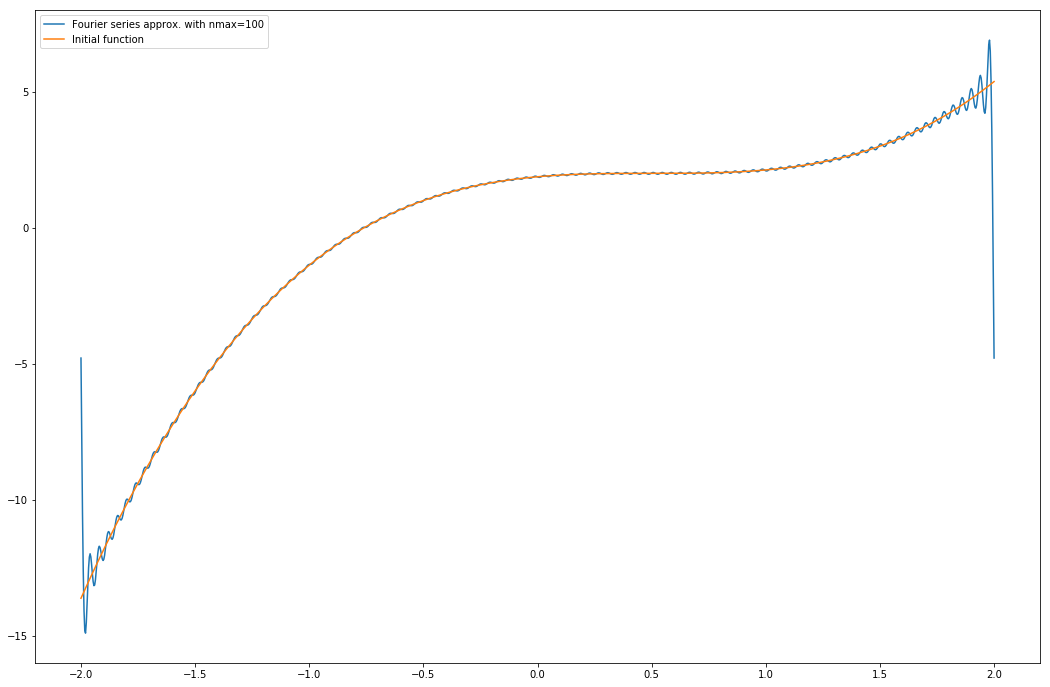

In [74]:
nmax=100
#x=(np.arange(1201)-800.)/200
x=(np.arange(1201)/300.-2)
y=(x-0.5)**3+2


def FourierSeriesApprox(xvals,yvals,nmax):
    approx=np.zeros_like(yvals)
    T=(xvals[-1]-xvals[0])
    print(xvals[-1],xvals[0],xvals.size)
    w=2*np.pi/T
    dt=xvals[1]-xvals[0]
    approx=approx+1/T*(np.sum(yvals)*dt)
    
    an=np.zeros(nmax+1)
    bn=np.zeros(nmax+1)
    for n in (np.arange(nmax)+1):
        an[n]=2/T*np.sum(np.cos(w*n*xvals)*yvals)*dt
        bn[n]=2/T*np.sum(np.sin(w*n*xvals)*yvals)*dt
      
    
    for t in range(len(xvals)):
        for n in (np.arange(nmax)+1):
            #an=2/T*np.sum(np.cos(w*n*xvals)*yvals)*dt
            #bn=2/T*np.sum(np.sin(w*n*xvals)*yvals)*dt
            #approx[t]=approx[t]+an*np.cos(w*n*xvals[t])+bn*np.sin(w*n*xvals[t])
            approx[t]=approx[t]+an[n]*np.cos(w*n*xvals[t])+bn[n]*np.sin(w*n*xvals[t])
    return approx
        
yApprox=FourierSeriesApprox(x,y,nmax)
#plt.plot(x,y)
plt.figure(figsize=(18,12))
plt.plot(x,yApprox,label="Fourier series approx. with nmax=%i"%nmax)
plt.plot(x,y,label="Initial function")
plt.legend(loc="upper left")

**Figure 4.1.4**: 任意函数和该函数的傅立叶近似。Overlay of our arbitrary function and its Fourier series approximation for a given number of Fourier coefficients

***
注意到，区间边缘部分的拟合效果要比中间差，而且，$n_{max}$越小，边缘拟合效果越差，原因在于正弦和余弦函数一定会在某些点重复，因此造成了边缘采样偏差。

Note that our fit becomes worse at the edges if we are fitting a function with a different period than our sampling period. This is because our sines and cosines must repeat at some point - hence the divergence at the edges of our sampling.

<div class=warn>

每一个$n$都对应了采样区间上的一个空间频率，在有些频率上，周期函数的拟合效果更好，这正是傅立叶分析的重点，即试图找出那些能包含大部分函数信息的频率。随着$n_{max}$变大，我们得到的细节越来越精细，当$n_{max}$趋近无穷，非连续性问题处理地越好。

Each $n$ corresponds to a given *spatial frequency* of our function over the sampling range: there are certain frequencies for which our periodic functions prove better "fits" for our function. This is the **key point** of Fourier analysis: we seek to find what scales contain most of our function's information. As $n_{max}$ increases, we pick up finer and finer detail; as it tends to infinity, we get closer to being able to deal with discontinuities.
</div>

物理学家更喜欢用能量来讨论这个问题。每级频率都包含一定数量的信息，即该函数总能量中的部分能量。如果该函数是常数，对应的傅立叶级数也是常数，此时，我们可以说，该函数的所有能量都集中在$a_0$。我们将在[$\S$ 4.1.2.3 &#10549;](#vis:sec:ps)谈到使用“能量”这个词的理由。

Physicists tend to discuss this in terms of energy. Each characteristic scale has a certain amount of information - a certain amount of "energy" from the function's total energy budget. If the function is constant, for example, we know that the characteristic scale will be in the constant term in the Fourier series (i.e. $a_0$): equivalently, we can say that all the function's power is concentrated in $a_0$. The reason we talk about "power" is explained in [$\S$ 4.1.2.3 &#10549;](#vis:sec:ps).

傅立叶级数也可以写成复指数形式：

<center>
\begin{align}\displaystyle
f(t) &= \sum_{n=-N}^N c_n e^{i w_n t}\\
w_n  &= \frac{2\pi n}{x_1-x_0}\\
c_n  &= \frac{1}{x_1-x_0} \int_{x_0}^{x_1} f(t) \cdot e^{-i w_n x}dx
\end{align}</center>

Note that the Fourier series can also be written in terms of a complex exponential as follows:

<center>
\begin{align}\displaystyle
f(t) &= \sum_{n=-N}^N c_n e^{i w_n x}\\
w_n  &= \frac{2\pi n}{x_1-x_0}\\
c_n  &= \frac{1}{x_1-x_0} \int_{x_0}^{x_1} f(t) \cdot e^{-i w_n x}dx
\end{align}</center>

##### 4.1.2.2 傅里叶变换 Fourier Transform

***

在上面的例子中，我们采取了“有限时间段limited time band”，并找出了与每个“离散空间频率discrete spatial frequencies”相对应的系数（权重）。然而，我们为什么要把自己限制在“离散”空间频率上呢？确实，只要$n_{max}$够大，我们就能对函数的傅立叶系数进行“连续”采样“。

In the example above, we have taken a *limited time band* and found weights associated with *discrete spatial frequencies*. However, why should we restrict ourselves to *discrete* spatial frequencies? Indeed, with sufficiently large $n_{max}$, we should approach a *continuous* sampling of our function's Fourier coefficients.

如果区间范围无限(i.e. $[x_0,x_1]\rightarrow[-\infty,\infty]$)且采样级数无限，则可以用傅立叶级数的复指数形式来定义函数$f$的傅立叶变换$\tilde{f}$：

By considering our function over its full range (i.e. $[x_0,x_1]\rightarrow[-\infty,\infty]$) and sampling infinitesimally finely in space, we can thus take the complex exponential form of the Fourier series to define the Fourier transform $\tilde{f}$ of a function $f$ defined in 
Note that Fourier series are covered in greater mathematical detail in [$\S$ 2.4. &#10142;](../2_Mathematical_Groundwork/2_4_the_fourier_transform.ipynb):

<center> $\displaystyle \tilde{f}(s) = \int_{-\infty}^{\infty} f(t) e^{-i2\pi t s} dt$ </center> 

换句话说，我们针对函数$f(t)$的每个频率空间创建了一个“连续”的系数（权重）描述，这正是我们本节要分析的内容，之前关于傅立叶级数的所有观点都适用于傅立叶变换，傅立叶变换比傅立叶级数更具普遍性。

注意到，上面的傅立叶变换在“时间”频率和“空间”频率上都有效，天文学家更喜欢空间频率，通过对天空的二维图像做傅立叶变换，找出源的亮度处在哪些频率上，更重要的应用在于，如果知道了天空的傅立叶空间，通过傅立叶变换，得到天空图像。

In other words, we create a *continuous* description <span style="background-color:cyan">TLG:GM: Are these definitions in the glossary?</span>, for every frequency, of the relative "weight" of the scale associated with that frequency in our function $f(t)$. For the purposes of this section, that is as far as we will take our analysis; everything that's been said about Fourier series holds for Fourier transforms, which are a more general case of the former.

<div class=advice>
Note that this works for both *time* frequencies and *spatial* frequencies. <span style="background-color:cyan">TLG:GM: Are these definitions in the glossary?</span> This latter quantity is what interests us as astronomers - by taking the (2-dimensional) Fourier transform of a (2-dimensional) image of the sky, we can find where the light of our sources lies. Most importantly, **the reverse is true**: we can recreate an image if we know its Fourier space well enough!
</div>

<span style="background-color:cyan">TLG:ST: Use a note style</span>
<span style="background-color:red">TLG:GC: See the comments about the figures below.</span>

##### 4.1.2.2.1 边界问题 Boundary Problems
<span style="background-color:red">TLG:MC: Very important but merge into 2.4.</span>

<span style="background-color:cyan">TLG:GN: Are F Transform and Series in Glossary? Italic them too.</span>

***

跟傅立叶级数相比，傅立叶变换的一个重要优势在于，我们不用再考虑边界设置问题。

One key advantage Fourier transforms hold over Fourier series is that we are no longer beholden to poorly-set boundaries. Consider a simple sine wave of the following form:

<center> $f(x) = sin(4x)$ </center>

对于上面这个函数，如果我们想要针对某一个区间，找出它的傅立叶系数，就会碰到边界问题。请注意观察下面的例子：

If we try to find the Fourier coefficient for this function over a range other than a multiple of its period, then we may run into problems. Observe:

[ 0.         -0.13763919]
[0.         1.00943544]
[ 0.00000000e+00 -2.36847579e-17]
[0. 1.]


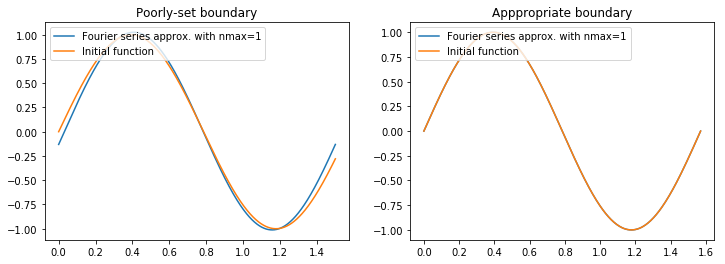

In [76]:
def FourierSeriesApprox(xvals,yvals,nmax):
    approx=np.zeros_like(yvals)
    T=(xvals[-1]-xvals[0])
    w=2*np.pi/T
    dt=xvals[1]-xvals[0]
    approx=approx+1/T*(np.sum(yvals)*dt)
    
    an=np.zeros(nmax+1)
    bn=np.zeros(nmax+1)
    for n in (np.arange(nmax)+1):
        an[n]=2/T*np.sum(np.cos(w*n*xvals)*yvals)*dt
        bn[n]=2/T*np.sum(np.sin(w*n*xvals)*yvals)*dt    
    print(an)
    print(bn)
    
    for t in range(len(xvals)):
        for n in (np.arange(nmax)+1):
            #an=2/T*np.sum(np.cos(w*n*xvals)*yvals)*dt
            #bn=2/T*np.sum(np.sin(w*n*xvals)*yvals)*dt
            #approx[t]=approx[t]+an*np.cos(w*n*xvals[t])+bn*np.sin(w*n*xvals[t])
            approx[t]=approx[t]+an[n]*np.cos(w*n*xvals[t])+bn[n]*np.sin(w*n*xvals[t])
    return approx

nmax=1
x=(np.arange(1201))/800.
y=np.sin(4*x)
yApprox=FourierSeriesApprox(x,y,nmax)

x1=(np.arange(601-300)*np.pi)/600
y1=np.sin(4*x1)
y1Approx=FourierSeriesApprox(x1,y1,nmax)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(x,yApprox,label="Fourier series approx. with nmax=%i"%nmax)
plt.plot(x,y,label="Initial function")
plt.legend(loc="upper left")
plt.title("Poorly-set boundary")
#plt.show()
plt.subplot(1,2,2)
plt.plot(x1,y1Approx,label="Fourier series approx. with nmax=%i"%nmax)
plt.plot(x1,y1,label="Initial function")
plt.legend(loc="upper left")
plt.title("Apppropriate boundary")
plt.show()

**图 4.1.5**：若区间选取合适，一个傅立叶系数都能得到较好的拟合效果；若边界设置不当，再多的傅立叶系数也得不到好的效果。

**Figure 4.1.5**: With an appropriate choice of boundaries, can replicate a function with a single Fourier coefficient - with poor boundary choice, even an infinite amount of Fourier coefficients will not suffice.

***
上面例子中的两个函数y和y1，唯一的区别在于区间范围不同。y的区间为[0,1.5），y1的区间为[0, $\pi/2$）。我们仅仅只是改变了函数y1的区间，就得到了非常准确的拟合效果！由此可见，傅立叶次数不变的情况下，不好的边界设置会带来一些问题。

The only change between those two functions is the range over which they are plotted (i.e. $x_{min}$ and $x_{max}$). In the first case, we go from 0 to 3, and in the second case from 0 to $\pi$. Although we have only changed our function's boundaries, we get the **exact** result with $n_{max}=2$ in the second case! The point here is the **characteristic Fourier scales of our function are unchanged** - but that **boundary errors** - poorly-set boundaries, in other words - can cause issues when trying to retrieve these scales.

傅立叶变换则不存在上述问题：傅立叶变换针对全空间进行采样，而不是只在给定范围内进行采样。

Fourier transforms do not have this problem: they sample over all space, and therefore never sample under the period of any given characteristic scale of our original function. 

##### 4.1.2.2.2 正弦函数的傅里叶变换 Fourier transform of a sine function

***
在上面的例子里，边界为$x=[0,\pi/2]$的情况下，只需要一个傅立叶系数，即$n_{max}=1$，我们就复原了函数，这就引出了一系列问题：我们究竟有多少个非零的傅立叶系数，其值是多少？

Having recovered our function with $n_{max}=2$, and knowing that the boundaries used to do so were $x=[0,\pi/2]$: how many non-zero Fourier coefficients do we have, and what's their value? What do we get with the right boundaries and $n_{max}=1$, and what does that tell us?

我们知道奇函数的积分结果为零，所以，在上面的例子里，$a_0 = 0$。同理，因为函数为奇，所以所有的$b_n$也为零。因为该函数的区间平均为零，所以$a_1$ 为零，而$a_2$将得到合适的函数，因为它有正确的$w_n$。

We know that the function is odd, so the integral over the range will be zero: $a_0 = 0$. Similarly, because the function is odd, all $b_n$ will be zero, since our function has no even characteristic scales. $a_1$ will be zero, because the function averages to zero over the periods this function investigates. $a_2$, however, will pick up the exact function: it has the correct $w_n$!

用更大的$n_{max}$会改变左边不合适边界的傅立叶级数的拟合结果，但是也达不到合适边界一样的效果。这就意味着，对于合适的边界，所有的$a_{n \ne 2} = 0$！而傅立叶变换则不存在边界问题。

Putting a larger $n_{max}$ will change the poorly-bound Fourier series, but not the appropriately-bound one; you can try this for yourself. This means that, in the appropriately-bound case, all $a_{n \ne 2} = 0$ ! Knowing that Fourier transforms never suffer from boundary problems: what is the 1-D Fourier transform of this function? What would it be for $f(x) = \cos(2x) $ ?

<div class=warn>

一个图像空间里的正弦（或余弦）函数等效于uv空间中的一个“点”：一个正弦或余弦函数的傅立叶变换是该函数在频率空间上的一个狄拉克delta函数。射电天文学家在讨论“干涉条纹”的时候，会这样说：图像空间的周期函数对应uv平面的一个点。

As it happens, a sine (or cosine) in the image plane is equivalent to a **point** in the uv-plane: the Fourier transform of a sine or cosine is a *Dirac delta* placed at the function's frequency. This is what radio astronomers refer to when they talk about *interference fringes*: they are talking about the image-plane periodic function associated with a uv-plane point.
</div>


##### 4.1.2.2.3 狄拉克函数的傅里叶变换 Fourier transform of a Dirac delta

因此，点源的傅立叶变换在所有傅立叶空间中是常数，这对*条纹*（每一个条纹对应一个傅里叶组成函数或者空间频率）意味着什么？显而易见，每个条纹对应一个点源，这在空间尺度同样存在。 如果对狄拉克函数进行平移会发生什么？


***
来看一个极端的例子，图像中所有像素点为零，只有中间的一个像素有值，这通常用一个Dirac delta函数来描述（[$\S$ 2.2 &#10142;](../2_Mathematical_Groundwork/2_2_important_functions.ipynb)）；

* 无限细
* 无限高
* 积分为1:$\int_{-\infty}^{+\infty} \delta(x)dx = 1$

Consider the extreme case of a point source sitting in the middle of an otherwise empty image (i.e. only one white pixel on an otherwise black image). This is typically described by using a Dirac delta - as defined in [$\S$ 2.2 &#10142;](../2_Mathematical_Groundwork/2_2_important_functions.ipynb):

* Infinitely thin

* Infinitely high

* Constant area: $\int_{-\infty}^{+\infty} \delta(x)dx = 1$

换句话说，可以把狄拉克delta函数看成是一种高斯函数的极端情况，其$\sigma \rightarrow 0$，且$A\rightarrow\infty$，同时，高斯曲线所围的面积为一个常数。

In other words, you can think of the Dirac delta as the limit where a Gaussian has $\sigma \rightarrow 0$ and $A\rightarrow\infty$, while keeping the area under the Gaussian a constant.


假设有一个一维图像（对应屏幕上的一行像素），图像上只有一个点源（只有一个像素有值，因此是一个Dirac delta函数），那么多少级最能代表该图像呢？如果用傅立叶变换（因为不用考虑边界问题），我们得到：

If we have a 1-dimensional image (i.e. a row of pixels on your computer screen) with a point source (i.e. only one pixel is activated - it thus contains a Dirac delta), what scale is most representative of our image? If we consider its Fourier transform (thus freeing us from questions of boundary), we get the following:

<center> \begin{align}
\displaystyle {f}(t) &= \delta(t)\\
\displaystyle \tilde{f}(s) &= \int_{-\infty}^{\infty} f(t) e^{-i2\pi t s}\\
                           &= \int_{-\infty}^{\infty} \delta(t) e^{-i2\pi t s} dt
\end{align} </center> 

结合Dirac delta函数的定义，很快得到：

By the definition of the Dirac delta, this immediately gives us:

<center> $\displaystyle \tilde{f}(s) =  e^{-i2\pi \cdot0\cdot s} = 1$ </center> 

点源（即单像素的源，天文图像中不可解析源）的傅立叶变换，在整个傅立叶空间都是常数。那怎么解释“条纹”（每个条纹都对应一个傅立叶分量或空间频率）呢？很简单，所有条纹都表示了点源，在所有空间频率均等存在。那么，如果函数Dirac delta发生了偏移，又会怎么样呢？

The Fourier transform of a point source (i.e. a single-pixel source. In terms of an astronomical image - an image of the sky - this is the definition of an *unresolved* source) is therefore a constant across all Fourier space. What does this mean in terms of *fringes* (each of which corresponds to **one** Fourier component or *spatial frequency*)? Quite simply that **every fringe** picks up the point source; it is **equally present** at **all spatial scales**. What happens if the Dirac delta is shifted? 


***
再来看一个二维图像上的点源。该点源位于 $(x_0,y_0)$，函数${f}(x,y)$描述了图像的亮度分布：

Let us consider a point source in a 2-dimensional image. If the source is located at coordinates $(x_0,y_0)$, then the function ${f}(x,y)$ describing the brightness distribution in our image (in our extended example, which single pixel is activated - at $x_0,y_0$) would be:

<center> $\displaystyle {f}(x,y) = \delta(x-x_0)\delta(y-y_0)$ </center> 

对应的傅立叶空间为：

And the corresponding Fourier space:

<center> 
\begin{align}
\displaystyle 
\tilde{f}(k_x,k_y) &= \int_{-\infty}^{\infty} f(x,y) e^{-i2\pi (k_x\cdot x + k_y\cdot y)} dk_y dk_x
\end{align}</center>

其中， $k_x$ 和 $k_y$ 分别表示图像在$x$ 和 $y$方向的空间频率。把 $f(x,y)$ 代入上式，根据Dirac delta函数，很快得到：

Note that here, we define $k_x$ and $k_y$ to be the *spatial frequencies* in our image, in the $x$ and $y$ directions respectively. Again, by plugging $f(x,y)$ into this equation and using the definition of the Dirac delta, we immediately find:

<center>\begin{align}
\displaystyle \tilde{f}(k_x,k_y) &= \int_{-\infty}^{\infty} \delta(x-x_0)\delta(y-y_0) e^{-i2\pi (k_x\cdot x + k_y\cdot y)} dk_y dk_x\displaystyle \\
                                 &= e^{-i2\pi (k_x\cdot x_0 + k_y\cdot y_0)}
\end{align}</center>

如果源位于图像的正中心（$x_0=y_0=0$），则对应的傅里叶平面为常数；若不在中心（用射电干涉阵的说法，不在相位中心，相应的知识在后续章节中国有明确说明），则对应的傅里叶空间包括两个线性组合的复波。换句话说，Dirac delta函数不在图像的中心，经过傅立叶变换，在uv平面上出现“条纹模式”，条纹的周期直接反映了点源函数在图像中的位置。也就是说，**傅立叶空间中的条纹模式对应了图像平面中的点源**。

If our source is at the centre of the image ($x_0=y_0=0$), then we recover our first result: the Fourier plane corresponding to our source is constant. If, however, our source is **not** in the centre of the image (in radio interferometric parlance, if it is not at **phase centre** - the reason for this name will be made explicit in later chapters), then our Fourier space consists of the linear combination of two complex waves. In other words, a Dirac delta not located in the centre of the image plane creates **a fringe pattern in the $uv$-plane** (i.e. Fourier space), the periods of which are directly related to its position. In other words, **a fringe pattern in Fourier space corresponds to a point source in the image plane**.

##### 4.1.2.2.4  高斯函数的傅立叶变换 Fourier transform of a Gaussian

***
实际上，空中的点源很少，更多的是二维的高斯源：

In practice, few sources in the sky are simple point sources. A more "physical" source is a two-dimensional Gaussian:

<big><center> $\displaystyle f(x,y) = a e^{-\frac{(x-\mu_x)^2}{2\sigma_x^2}}e^{-\frac{(y-\mu_y)^2}{2\sigma_y^2}} = a e^{-\frac{(x-\mu_x)^2+(y-\mu_y)^2}{2(\sigma_x^2+\sigma_y^2)}}$ </center></big>

可以用不同的$\mu_x,\mu_y,\sigma_x,\sigma_y$二维高斯来描述各种斑点形状的源，更复杂的源可以用多个高斯的组合来描述。一个简单高斯源的uv平面是什么样子呢？在我们的例子里，由于$f(x,y) = f(x)f(y)$，我们可以把该二维傅立叶积分拆分成两个一维傅立叶积分的积，并结合2.4.2的结果，得到：

With different values of $\mu_x,\mu_y,\sigma_x,\sigma_y$, all sorts of "blob-like" sources can be described. More complex sources can be described as a combination of multiple Gaussians. What does the uv-plane of a simple Gaussian source look like? In our case, since $f(x,y) = f(x)f(y)$, we can split the two-dimensional Fourier integral into the product of two one-dimensional Fourier integrals and use the result from Section 2.4.2:

<center> 
\begin{align}
\displaystyle
\tilde{f}(k_x,k_y) &= \int_{-\infty}^{\infty} f(x,y) e^{-i2\pi (k_x\cdot x + k_y\cdot y)} dk_y dk_x\\
                   &= \int_{-\infty}^{\infty} f(x) e^{-i2\pi k_x\cdot x} dk_x \int_{-\infty}^{\infty} f(y) e^{-i2\pi k_y\cdot y} dk_y\\
                   &= a e^{-\imath 2\pi \mu_x k_x}\,\sqrt{2\pi}\sigma_x\,e^{-2\pi^2k_x^2\sigma_x^2} e^{-\imath 2\pi \mu_y k_y}\, \sqrt{2\pi}\sigma_y\,e^{-2\pi^2k_y^2\sigma_y^2}\\
                   &= 2\pi a \sigma_x \sigma_y e^{-2\pi^2 (k_x^2 \sigma_x^2 + k_y^2 \sigma_y^2)}e^{-i 2\pi (\mu_x k_x + \mu_y k_y)}
\end{align}</center>

如果我们的高斯源位于相位中心（即$\mu_x=\mu_y=0$），就得到另一个高斯：

If our Gaussian is located at phase centre (i.e. if $\mu_x=\mu_y=0$), then  we are left with another Gaussian:

<center>\begin{align}
\tilde{f}(k_x,k_y) &= 2\pi a \sigma_x \sigma_y e^{-2\pi^2 (k_x^2 \sigma_x^2 + k_y^2 \sigma_y^2)} e^0\\
                   &= 2\pi a \sigma_x \sigma_y e^{-(\frac{k_x^2}{2\sigma_{kx}^2}+\frac{k_y^2}{2\sigma_{ky}^2})}\\
\sigma_{kx}        &= \frac{1}{2\pi\sigma_x}\\
\sigma_{ky}        &= \frac{1}{2\pi\sigma_y}
\end{align}</center>

换句话说，uv平面上高斯的宽度反映了原始高斯的宽度，如果原始高斯不在相位中心，就在$k$空间（uv平面）上得到一个条纹模式跟高斯的积。条纹的周期由高斯的位置$(\mu_x,\mu_y)$决定，因此我们就知道了原始图像中高斯的位置。

In other words, the width of our uv-plane Gaussian directly tells us the width of the original Gaussian. If our original Gaussian is located somewhere other than phase centre, we now get a Gaussian multiplied with a fringe pattern in $k$-space (i.e. in the uv-plane). The period of these fringes depends only on $(\mu_x,\mu_y)$ and therefore tell us where the Gaussian is located.

### 4.1.3 图像平面和傅立叶平面的关系 Relationship between Image and Fourier planes

到目前为止，我们的分析还局限在单个源。自然，天空中不止一个源，那么，多源图像的傅立叶平面又是什么样子呢？

So far, we have restricted our analyses to images with a single source. Of course, we know that the sky has a lot more than a single source - what then of the Fourier plane of images with more than a single source?

让我们再来看一张有$n$个任意形状源的图像，每个源的函数为$f_n(x,y)$。则图中每个点的值为：

Let us consider an image with $n$ sources of arbitrary shapes, each defined by a functions $f_n(x,y)$. The value of this image at different positions would then be given by:
<center>
\begin{align}\displaystyle
B(x,y) &= \sum_n f_n(x,y)
\end{align}</center>

对$B(x,y)$做傅立叶变换，得到其傅立叶平面：

The corresponding Fourier plane, then, would be the Fourier transform of $B(x,y)$:

<center>
\begin{align}\displaystyle
\tilde{B}(k_x,k_y) &= \text{FT}\big[B(x,y)\big]\\
                   &= \text{FT}\bigg[\sum_n f_n(x,y)\bigg]\\
                   &= \sum_n \text{FT}\bigg[f_n(x,y)\bigg]\\
\end{align}</center>

换句话说，图像中每个源的傅立叶变换的线性和，构成该图像的傅立叶平面。这就意味着，对于一张图像来说，“读出”其傅立叶平面就足够了，但实际上，这是不可能的！只有魔法能做到。

In other words, the Fourier plane of our image consists of the linear sum of the Fourier components of each individual source. This means that, in practice, "reading" the Fourier plane of a given image is all but impossible! Some mighty wizards can and do practice such high magic, but they are few and far between.

为什么要讨论这个呢？因为干涉仪不对图像空间进行采样，而是直接对傅立叶平面采样。本章后面的内容将专门讨论实际的做法，存在哪些限制以及如何避免。

Why is this relevant? Because interferometers do not sample the image plane: they **directly sample the Fourier plane**. The remainder of this chapter will be dedicated to outlining how this is done in practice, and the constraints this choice imposes (and avoids!).

#### Format status:
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : LF: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : NC: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : RF: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : HF: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : GM: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : CL: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : ST: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : FN: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : SP: 2017/02/06
* <span style="background-color:red">&nbsp;&nbsp;&nbsp;&nbsp;</span> : TC: Date
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : XX: 2017/02/06

***

* Next: [4.2 The Baseline and its Representation in Space](4_2_the_baseline_and_its_representation_in_space.ipynb)